 # UDACITY - VEHICLE DETECTION PROJECT



#### Hiep Truong Cong

### Content
1. Includes
2. Feature extraction
    + Color feature extraction
    + Historgram fearture extraction
    + HOG feature extraction
    + Combination of extracted features
3. Training a classifier
    + Prepare training data
    + Normalize the traing data
    + Training the classifier
    + Evaluate the classifier
4. Sliding window search
    + Sliding window
    + Classifier at a single scale
    + Classify with multi-scale windows
    + Combine detected windows
5. Video pipeline

## 1. Includes

In [1]:
from Training_Model import *
from lesson_functions import *
import matplotlib.image as mpimg
from Finding_Car import *
from scipy.ndimage.measurements import label
from moviepy.editor import VideoFileClip
from IPython.display import HTML

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 2. Feature extraction

#### Read image data

The number of vehicle images is 8792.
The number of non-vehicle images is 8968.


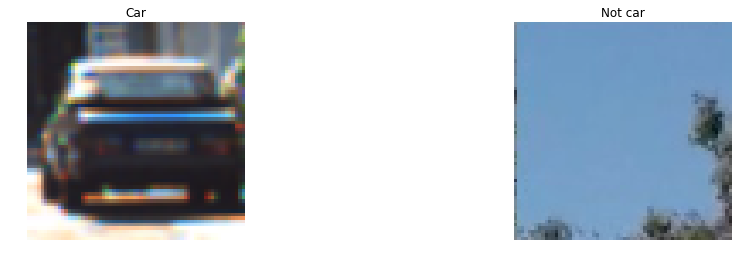

In [2]:
dirName = './FeatureSetBig'
cars, notcars = Read_Data(dirName)
print('The number of vehicle images is {}.'.format(len(cars)))
print('The number of non-vehicle images is {}.'.format(len(notcars)))
car_example = mpimg.imread(cars[0])
notcar_example = mpimg.imread(notcars[0])
Plot_Images([car_example, notcar_example], 2, title = None, sub_plt_titles = ['Car', 'Not car'])

#### Color feature extraction

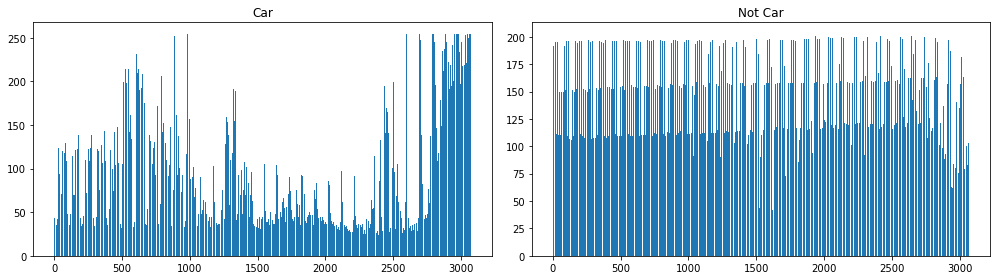

In [3]:
car_example = dtype2uint8(car_example)
notcar_example = dtype2uint8(notcar_example)
car_color_feature = bin_spatial(car_example)
notcar_color_feature = bin_spatial(notcar_example)

Subplot_Barchart(ydata =[range(len(car_color_feature)), range(len(notcar_color_feature))], 
                 xdata = [car_color_feature, notcar_color_feature],
                 titles = ['Car', 'Not Car'], 
                 number_diagram_per_row = 2)

#### Histogram feature extraction

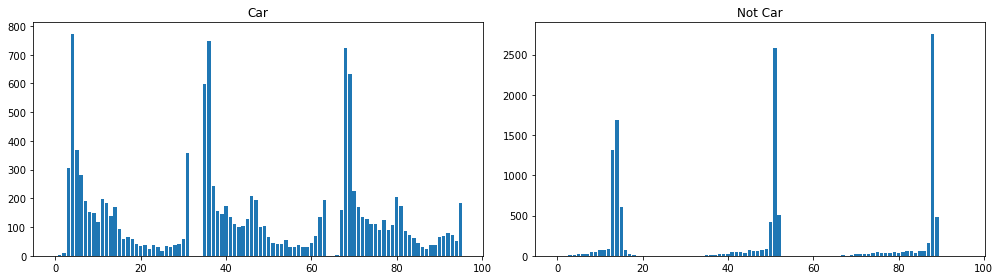

In [4]:
car_example = dtype2uint8(car_example)
notcar_example = dtype2uint8(notcar_example)

car_hist_feat = color_hist(car_example)
notcar_hist_feat = color_hist(notcar_example)

Subplot_Barchart(ydata =[range(len(car_hist_feat)), range(len(notcar_hist_feat))], 
                 xdata = [car_hist_feat, notcar_hist_feat],
                titles = ['Car', 'Not Car'], number_diagram_per_row = 2)

#### HOG feature

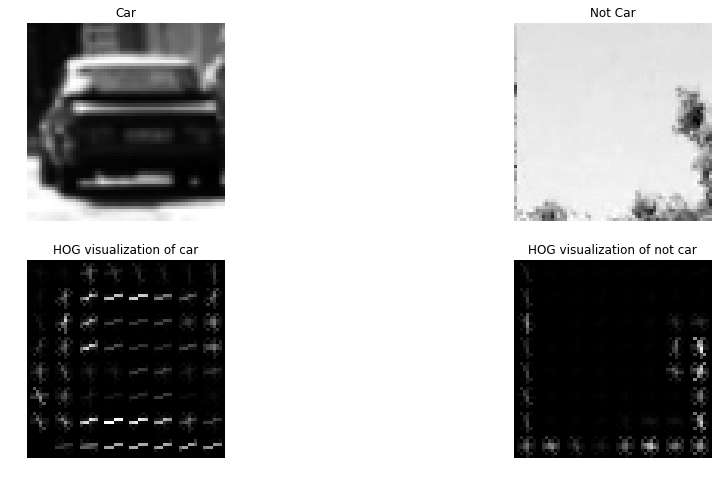

In [5]:
car_example1 = mpimg.imread(cars[0])
notcar_example1 = mpimg.imread(notcars[0])
car_gray = cv2.cvtColor(car_example1, cv2.COLOR_RGB2GRAY)
notcar_gray = cv2.cvtColor(notcar_example1, cv2.COLOR_RGB2GRAY)
Hog_car_example, hog_img_car = get_hog_features(car_example1[:,:,0], 9, 8,2, vis=True)
Hog_notcar_example, hog_img_notcar = get_hog_features(notcar_gray, 9, 8,2, vis=True)

Plot_Images([car_gray,notcar_gray,hog_img_car, hog_img_notcar], number_img_per_row = 2, title = None,
            sub_plt_titles  = ['Car', 'Not Car', 'HOG visualization of car', 'HOG visualization of not car'])

## 3. Training a classifier

* Transform the data images into feature space
* Training a support vector machine classifier
* Test its performance

#### Tranform data images into feature space

In [6]:
color_space = 'YUV'
spatial_size=(32,32)
hist_bins=32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL"
spatial_feat=True
hist_feat=True
hog_feat=True

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

#### Training a support vector machine classifier

In [7]:
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rand_state)
        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# Use a linear SVC 
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

####  Test SVC classifier performance

In [8]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  0.9896
My SVC predicts:  [0. 1. 1. 1. 0. 1. 1. 1. 0. 0.]
For these 10 labels:  [0. 1. 1. 1. 0. 1. 1. 1. 0. 0.]
0.01602 Seconds to predict 10 labels with SVC


## 4. Sliding window search

#### Slide window

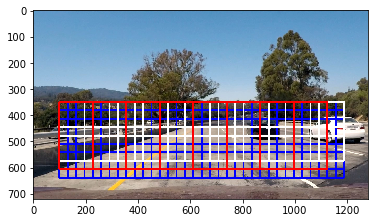

In [23]:
image = mpimg.imread('./test_images/test1.jpg')


window_list1 = slide_window(image, x_start_stop=[100, 1200], y_start_stop=[350, 650], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))

window_list2 = slide_window(image, x_start_stop=[100, 1200], y_start_stop=[350, 650], 
                    xy_window=(128, 128), xy_overlap=(0.25, 0.25))

window_list3 = slide_window(image, x_start_stop=[100, 1200], y_start_stop=[350, 650], 
                    xy_window=(256, 256), xy_overlap=(0.5, 0.5))

window_img = draw_boxes(image, window_list1, color = (0,0,255))
window_img = draw_boxes(window_img, window_list2, color = (255,255,255))
window_img = draw_boxes(window_img, window_list3, color = (255,0,0))

plt.imshow(window_img)
plt.show()

#### Classify at a single scale


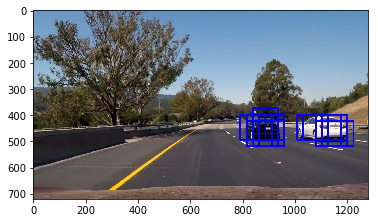

In [24]:
image = mpimg.imread('./test_images/test6.jpg')
scale = 1.5
ystart= 350
ystop = 650

rectangles = find_cars(image, color_space, 
                       ystart, ystop, 
                       scale, svc, 
                       X_scaler, orient, 
                       pix_per_cell, cell_per_block, 
                       spatial_size, hist_bins)

window_img = draw_boxes(image, rectangles, color = (0,0,255))
plt.imshow(window_img)
plt.show()

#### Classify with multi-scale windows

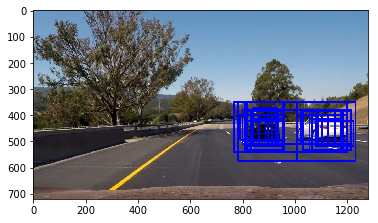

In [25]:
scales = [1.5,2.0, 2.3, 2,7, 3.0,3.5]
out_rectangles = Find_Car_Multi_Scale(scales, image, color_space, 
                                        ystart, ystop, 
                                        svc, X_scaler, 
                                        orient, 
                                        pix_per_cell, cell_per_block, 
                                        spatial_size, hist_bins)

window_img = draw_boxes(image, out_rectangles, color = (0,0,255))
plt.imshow(window_img)
plt.show()

#### Combine detected windows

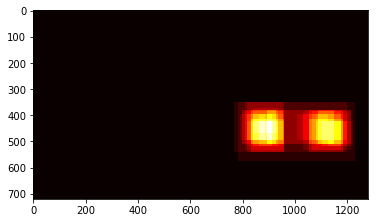

In [26]:
heat_map = add_heat(image, out_rectangles)
plt.imshow(heat_map, cmap='hot')
plt.show()

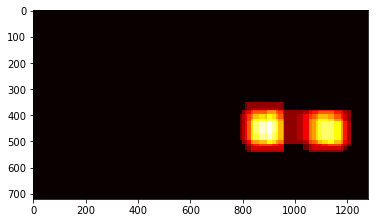

In [27]:
heat_map_thresholded = apply_threshold(heat_map, 2)
plt.imshow(heat_map_thresholded, cmap='hot')
plt.show()

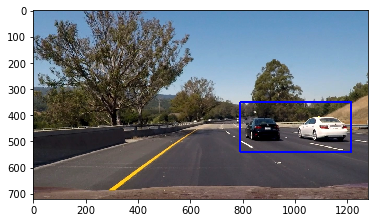

In [28]:
heatmap = np.clip(heat_map_thresholded, 0, 255)
labels = label(heatmap)
draw_img = draw_labeled_bboxes((image), labels)
plt.imshow(image)
plt.show()

#### Image pipeline

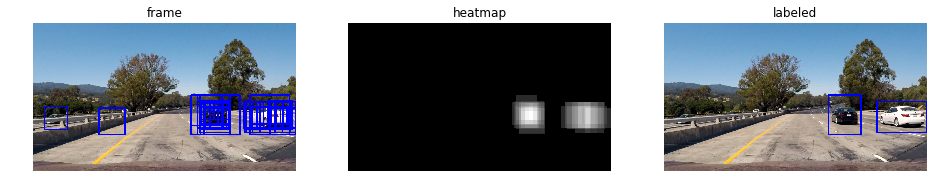

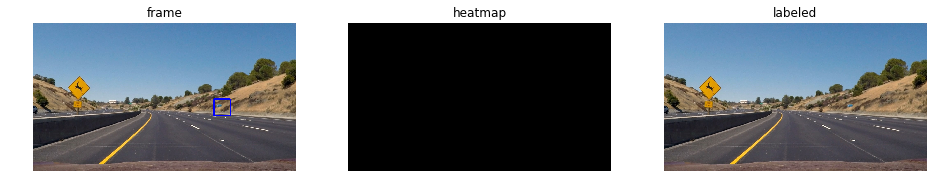

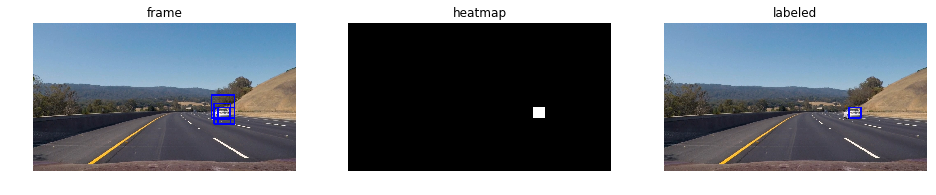

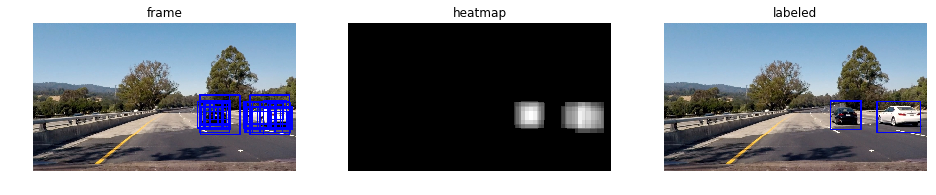

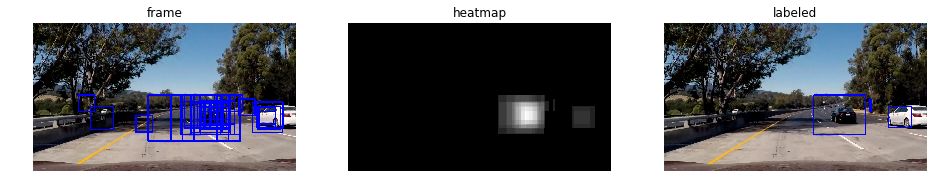

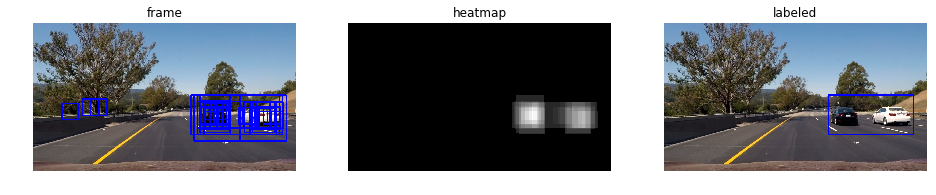

In [29]:
import glob

image = mpimg.imread('./test_images/test6.jpg')
def image_pipeline(image):
    scales = [1.25, 1.75, 2.0, 2.3, 2,7, 3.0,3.5]
    out_rectangles = Find_Car_Multi_Scale(scales, image, color_space, 
                                        ystart, ystop, 
                                        svc, X_scaler, 
                                        orient, 
                                        pix_per_cell, cell_per_block, 
                                        spatial_size, hist_bins)
    heat_map = add_heat(image, out_rectangles)
    heat_map_thresholded = apply_threshold(heat_map, 3)
    heatmap = np.clip(heat_map_thresholded, 0, 255)
    labels = label(heatmap)
    draw_img1 = draw_labeled_bboxes((image), labels)
    window_img = draw_boxes(image, out_rectangles, color = (0,0,255))
    Plot_Images([window_img, heat_map_thresholded, image], 3, title = None, sub_plt_titles  = ["frame", "heatmap", "labeled"])

images = glob.glob('./test_images' + '/*.jpg')

for image_name in images:
    image = mpimg.imread(image_name)
    image_pipeline(image)

## 5. Video pipeline

In [18]:
svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins = ReadSvcFromPickle('Svm.pkl')
ystart = 300
ystop = 700
colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
scales = [1.5,2.0, 2.3, 2,7, 3.0,3.5]
heatmap_threshold = 7
buffer = Window_buf(10)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
StandardScaler(copy=True, with_mean=True, with_std=True)
orient  9
pix_per_cell  8
cell_per_block  2
spatial_size  (16, 16)
hist_bins  32


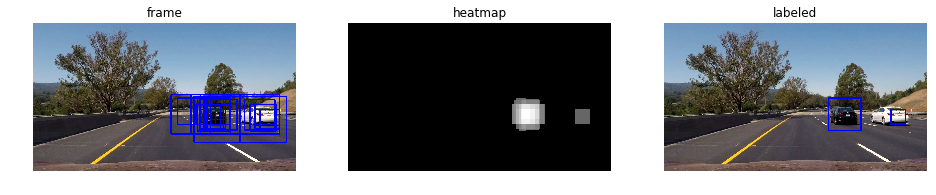

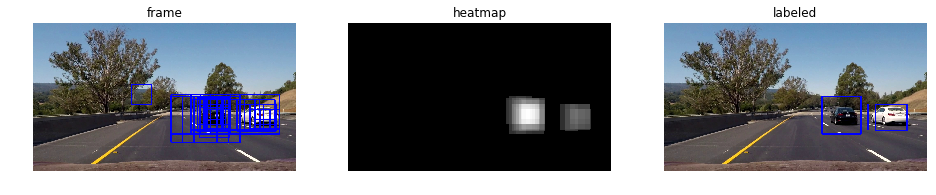

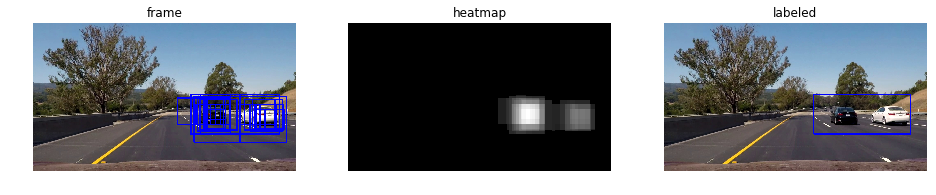

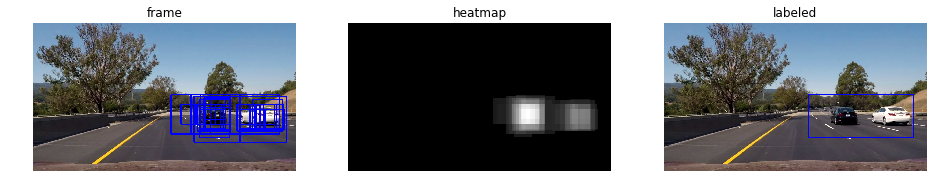

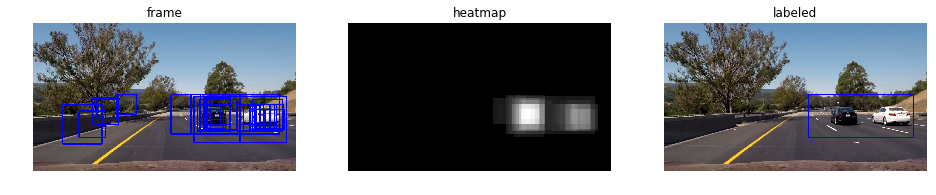

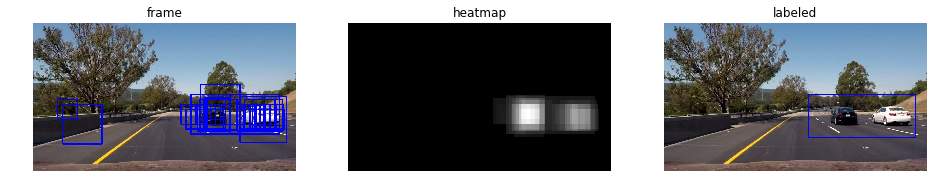

In [19]:
def Find_Car_In_Frame(img):
    global svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, ystart, ystop, scales, colorspace, buffer, heatmap_threshold
    out_rectangles = Find_Car_Multi_Scale(scales, img, colorspace, 
                                          ystart, ystop, 
                                          svc, X_scaler, 
                                          orient, 
                                          pix_per_cell, cell_per_block, 
                                          spatial_size, hist_bins)
    buffer.push_wins(out_rectangles)
    rectang = buffer.get_concate()
    heat_map = add_heat(img, rectang)
    heatmap_img = apply_threshold(heat_map, heatmap_threshold)
    labels = label(heatmap_img)
    draw_img, rect = draw_labeled_bboxes(np.copy(img), labels)
    return draw_img, heatmap_img, out_rectangles

images = glob.glob('./extracted' + '/*.jpg')

for image_name in images:
    image = mpimg.imread(image_name)
    draw_img1, heatmap_img, out_rectangles = Find_Car_In_Frame(image)
    window_img = draw_boxes(image, out_rectangles, color = (0,0,255))
    Plot_Images([window_img, heatmap_img, draw_img1], 3, title = None, sub_plt_titles  = ["frame", "heatmap", "labeled"])


In [34]:
def Find_Car_In_Frame(img):
    global svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, ystart, ystop, scales, colorspace, buffer, heatmap_threshold
    out_rectangles = Find_Car_Multi_Scale(scales, img, colorspace, 
                                          ystart, ystop, 
                                          svc, X_scaler, 
                                          orient, 
                                          pix_per_cell, cell_per_block, 
                                          spatial_size, hist_bins)
    buffer.push_wins(out_rectangles)
    rectang = buffer.get_concate()
    heat_map = add_heat(img, rectang)
    heatmap_img = apply_threshold(heat_map, heatmap_threshold)
    labels = label(heatmap_img)
    draw_img, rect = draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

def Processing_video(input_video, output_video):
    clip1 = VideoFileClip(input_video)
    white_clip = clip1.fl_image(Find_Car_In_Frame)
    white_clip.write_videofile(output_video, audio=False)

input_project_video = './test_videos/test_video.mp4'
file_name =  input_project_video.replace('./test_videos/', '')
output_project_video = 'output_' + file_name

Processing_video('test_video.mp4', output_project_video)

[MoviePy] >>>> Building video output_test_video.mp4
[MoviePy] Writing video output_test_video.mp4


 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [00:46<00:01,  1.23s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_test_video.mp4 



In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_project_video))

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

input_video = './test_videos/test_video.mp4'
file_name =  input_video.replace('./output_videos/', '')
file_name =  file_name.replace('.mp4', '')
cap = cv2.VideoCapture(input_video)
frames_to_extract = [1,2,3,4,5,6]
frame_number = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if frame_number in frames_to_extract:
            file_name_to_write = './extracted/'+ str(frame_number) + '.jpg'
            cv2.imwrite(file_name_to_write, frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    frame_number = frame_number + 1
